In [1]:
import clearbox as cb
from clearbox import datasets
import clearbox.notebooks as nb

import numpy as np

import matplotlib.pyplot as plt

# k-means

An example of how k-means works. Before we start, we'll define a few utility functions for our plots. You can ignore these for now.

In [2]:
def plot_new_means(model, data, oldmeans):
    
    plt.figure(figsize=(6, 4.5))

    # data
    for c, col, m in zip(range(3), [nb.BLUE, nb.RED, nb.GREEN], ['o', 'D', 'X']):
        sub = x[model.clusters==c]
        plt.scatter(sub[:, 0], sub[:, 1], s=s, alpha=0.2, color=col, linewidth=0, marker=m)

    # means
    for i, col, m in zip(range(3), [nb.BLUE, nb.RED, nb.GREEN], ['o', 'D', 'X']):
        plt.scatter(oldmeans[i, 0], oldmeans[i, 1], s=s*8, alpha=0.5, color=col, linewidth=0, marker=m)
        plt.scatter(model.means[i, 0], model.means[i, 1], s=s*8, alpha=1, color=col, linewidth=0, marker=m)

        # Plot an arrow from the old to the new means
        plt.arrow(x=oldmeans[i, 0], y=oldmeans[i, 1], dx=model.means[i, 0]-oldmeans[i, 0], dy=model.means[i,1]-oldmeans[i, 1], 
                  color=col, length_includes_head=True)

    nb.cleaner()
    
def plot_new_clusters(model, data, changed=None):
    
    n, d = data.shape
    
    plt.figure(figsize=(6, 4.5))
    
    if changed is None:
        changed = np.full(fill_value=True, shape=(n,))

    # Iterate over the three clusters
    for c, col, m in zip(range(3), [nb.BLUE, nb.RED, nb.GREEN], ['o', 'D', 'X']):
        sub = x[model.clusters==c]
        asub = changed[model.clusters==c] * 0.8 + 0.2
        plt.scatter(sub[:, 0], sub[:, 1], s=s, alpha=asub, color=col, linewidth=0, marker=m)

    # Plot the means
    for i, col, m in zip(range(3), [nb.BLUE, nb.RED, nb.GREEN], ['o', 'D', 'X']):
        plt.scatter(model.means[i, 0], model.means[i, 1], s=s*8, alpha=1, color=col, linewidth=0, marker=m)

    nb.cleaner()
    
def plot_start(model, data):
    
    plt.figure(figsize=(6, 4.5))

    # The raw data (without species information)
    plt.scatter(x[:, 0], x[:, 1], s=s, alpha=0.6, color='k', marker='o', linewidth=0)

    # The three means
    for i, col, m in zip(range(3), [nb.BLUE, nb.RED, nb.GREEN], ['o', 'D', 'X']):
        plt.scatter(model.means[i, 0], model.means[i, 1], s=s*8, alpha=1, color=col, linewidth=0, marker=m)

    nb.cleaner()

We will demonstrate this on a subset of the Palmer penguin data. First we load it and we plot the data colored by species.

Text(0, 0.5, 'bill depth (mm)')

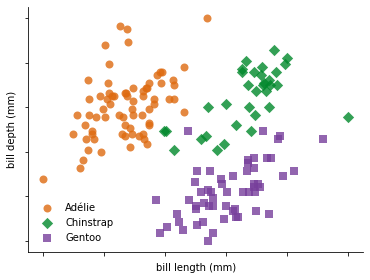

In [3]:
(x, y), _ = datasets.penguins_species()


plt.figure(figsize=(6, 4.5))


x1 = x[y == 0]
x2 = x[y == 1]
x3 = x[y == 2]


a = 0.8
s = 32
ps = cb.datasets.PENGUIN_SPECIES

plt.scatter(x1[:, 0], x1[:, 1], label=ps[0], s=s*2, alpha=a, color=nb.ORANGE, marker='o', linewidth=0)
plt.scatter(x2[:, 0], x2[:, 1], label=ps[1], s=s*2, alpha=a, color=nb.GREEN, marker='D', linewidth=0)
plt.scatter(x3[:, 0], x3[:, 1], label=ps[2], s=s*2, alpha=a, color=nb.PURPLE, marker='s', linewidth=0)

plt.xlabel('flipper length (dm)')
plt.ylabel('body mass (kg)')
plt.legend(frameon=False)

nb.cleaner()

plt.xlabel('bill length (mm)')
plt.ylabel('bill depth (mm)')

# plt.savefig('bill_data.pdf')


Note that the species information won't be passed to the clustering algorithm. We'll only give it the raw data. 

Next, we initialize the k-means model. We provide it with the number of clusters we'd like for this data, and we initialize the means to random values.

In [4]:
from clearbox.kmeans import KMeans

model = KMeans(k=3)
model.reset_means(data=x) 
# -- This is done automatically when you call model.fit(), but this way, we can see what the model looks like
#    before it has trained.

The model hasn't done any training yet. It has just picked three random points in our feature space, which we call the "means" of the three clusters. Let's plot the data as the model sees it, together with these three means.

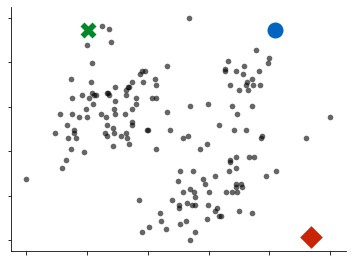

In [5]:
plot_start(model, data=x)

The means are places completely randomly in the data's bounding box. To center them on the natural clusters of the data, the k-means algorithm repeats two steps: **cluster assignment** and **recomputing the means**.

Let's start with cluster assignment. We simply iterate over all points in the data and assign them to the cluster corresponding to the mean that they are closest to. That is, the points that are closest to the red diamond are colored red, the points that are closes to the blue disc are colored blue and the points that are closest to the green cross are colored green.

This is implemented in the function `model.assign_clusters()`. The function returns the number of instances whose cluster assignment has changed (in this case all of them).

In [6]:
changed = model.assign_clusters(data=x)
changed.sum()

160

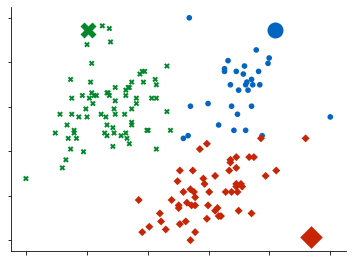

In [7]:
plot_new_clusters(model, x)  

The next step is to remove the means and recompute new means as the average of all the points in each cluster. The function return the average change in the means.

In [8]:
# Save the old means so we can plot the change.
oldmeans = model.means.copy()

model.fit_means(data=x)

0.20192194314320552

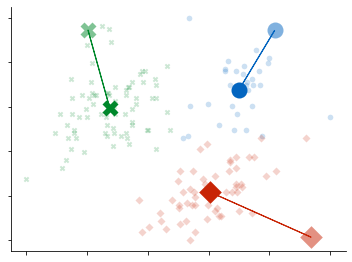

In [9]:
plot_new_means(model, x, oldmeans)

Now, we can re-assign the clusters using the new means. In the plot, we'll highlight which points have changed their cluster assignments.

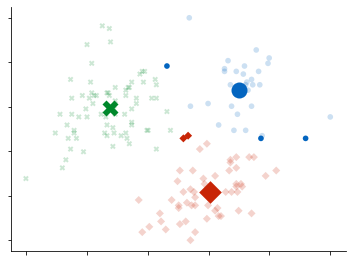

In [10]:
changed = model.assign_clusters(data=x)
changed.sum()

plot_new_clusters(model, x, changed)

Recomputing the means with these new clusters, we see a much smaller change.

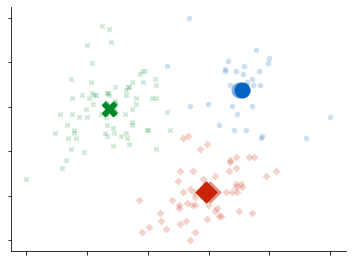

In [11]:
oldmeans = model.means.copy()
model.fit_means(data=x)

plot_new_means(model, x, oldmeans)

The kmeans fit() function runs this algorithm until no further points change cluster.

In [12]:
model = KMeans(k=3)

model.fit(data=x)

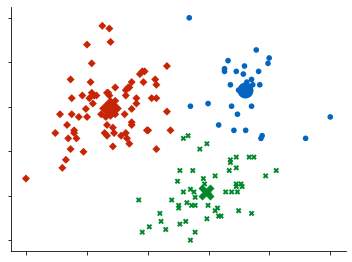

In [14]:
plot_new_clusters(model, data=x)